# Credit Card Fraudulence Detector with Machine Learning 

### Faisal Irzal

<br>
<br>
The aim of this project is to build a classifier that can detect credit card fraudulent transactions. A variety of machine learning algorithms will be used to enable us to discern fraudulent from non-fraudulent one. By the end of this machine learning project, one will learn how to implement machine learning algorithms to perform classification.

The datasets contains transactions made by credit cards in September 2013 by european cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data cannot be provided. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud (**Fraudulent**) and 0 otherwise (**Non-Fraudulent**).

Objective of this analysis is to:
1. analyze, select and reduce the current 28 features for the analysis
2. use the selected features to build a number of predictive models
3. compare the predictive models using available accuracy parameters

### 1. Load the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
# load the dataset from Google Drive
df_cc = pd.read_csv('creditcard.csv')
df_cc.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

### 2. Explore the Data

In [3]:
df_cc.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

<AxesSubplot:title={'center':'Null values checked'}>

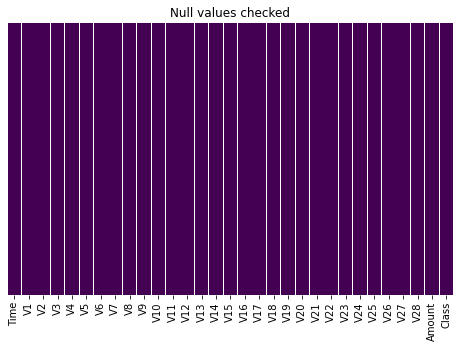

In [4]:
plt.subplots(figsize=(8,5))
plt.title('Null values checked')
sns.heatmap(df_cc.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

In [5]:
print('The sum of all Null values is =',df_cc.isnull().values.sum())

The sum of all Null values is = 0


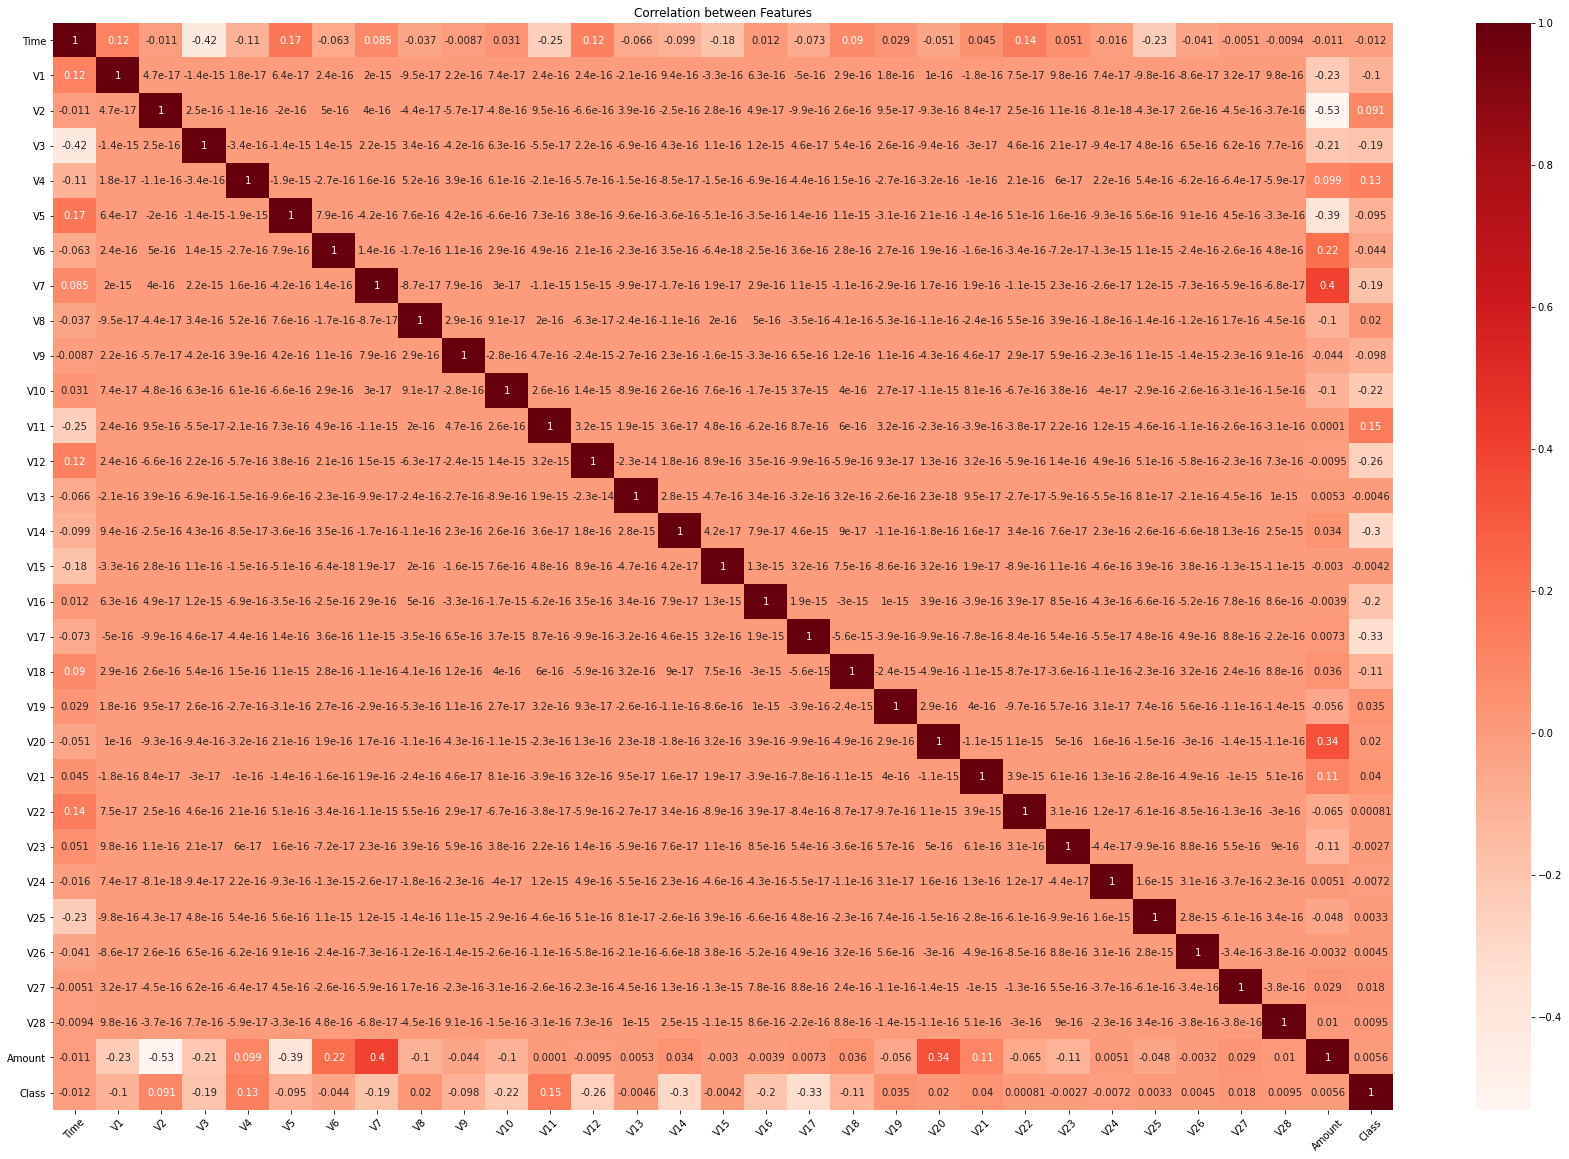

In [6]:
plt.figure(figsize=(30,20))
plt.xticks(rotation=45)
plt.title('Correlation between Features')
sns.heatmap(df_cc.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

Correlation matrix essentially give us the information on how the variables are correlated. The closer the correlation value of two different variables to 1 or -1, the stronger the influence (positive or negative) of one another. Since we are interested in the variable 'Class', we will zoom into this variable and see the correlation of variable Class to other variables.

We found the top 5 independent variables {V7, V10, V12, V14, V17} that should contains important information about whether a giving credit card transaction is fraudulent or not. We will call them from now on the **Select** variables.

The next step is to visualize the interesting relations that we obtained from the correlation matrix using scatter plots.

Let's plot each one of the Select variables against any other variable with the correlation value close to zero, e.g. variable V22 and color each data point with corresponding to its label (Fraudulent or Non-Fraudulent).

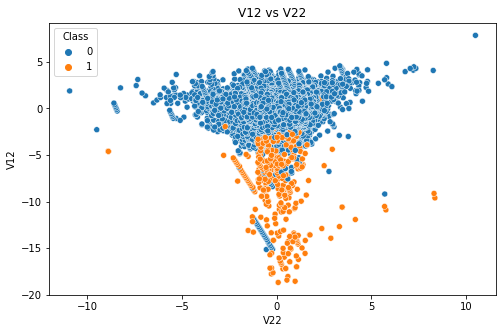

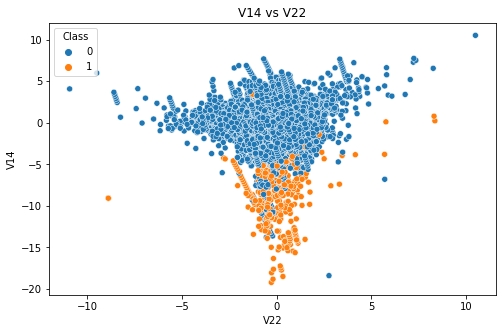

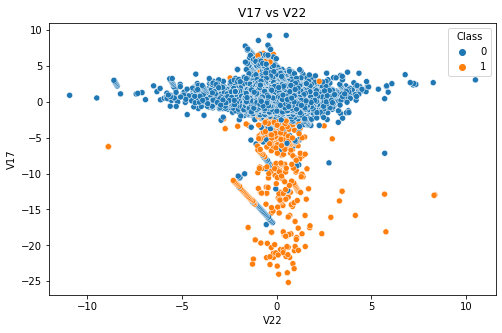

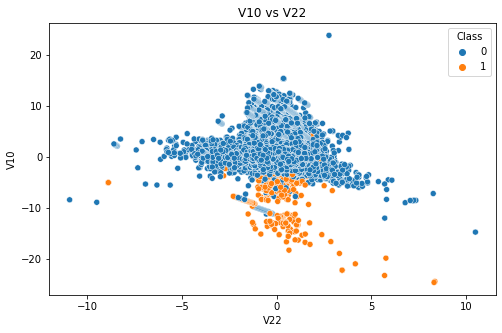

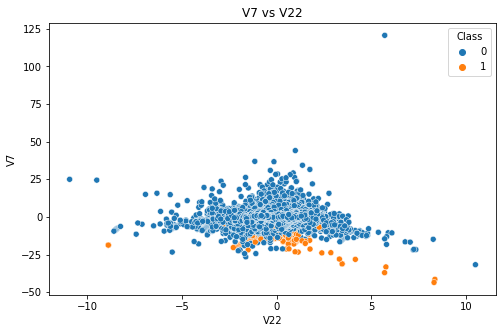

In [7]:
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(x=df_cc['V22'], y=df_cc['V12'], hue=df_cc['Class'])
ax.set_title('V12 vs V22')

plt.figure(figsize=(8, 5))
ax = sns.scatterplot(x=df_cc['V22'], y=df_cc['V14'], hue=df_cc['Class'])
ax.set_title('V14 vs V22')

plt.figure(figsize=(8, 5))
ax = sns.scatterplot(x=df_cc['V22'], y=df_cc['V17'], hue=df_cc['Class'])
ax.set_title('V17 vs V22')

plt.figure(figsize=(8, 5))
ax = sns.scatterplot(x=df_cc['V22'], y=df_cc['V10'], hue=df_cc['Class'])
ax.set_title('V10 vs V22')

plt.figure(figsize=(8, 5))
ax = sns.scatterplot(x=df_cc['V22'], y=df_cc['V7'], hue=df_cc['Class'])
ax.set_title('V7 vs V22')

plt.show()

It is noticeable in all five plots that we can draw a horizontal line that classifies almost all data points into their correct Class value. In other words, if we look at the y-axis that corresponds to one of the select variables {V,7, V10, V12, V14, V17}, then we can see that most fraudulent data points are located below the value of -5 and normal data points are located above.

In contrast, if we look at the x-axis where the non-select variable is, then both fraudulent and normal data points are almost equally distributed between -4 and 4, which means that we can't draw a vertical line to separate the two groups.

#### Is that good enough?

No. Although scatter plots gave us a general idea of what is going on, but they are not precise. So how we can take a better view?

### Kernel Density Estimation (KDE) plots

I will take each one of the select variables and approximate the underlying probability density function for each Class value (Frauds Vs. Non-Fraud) using kernel density estimation. This should give us a clear idea of how fraudulent and non-fraudulent datapoints (credit card transactions) are distributed along each variable. Also, for the sake of comparison, let's also plot the non-select variable V22.

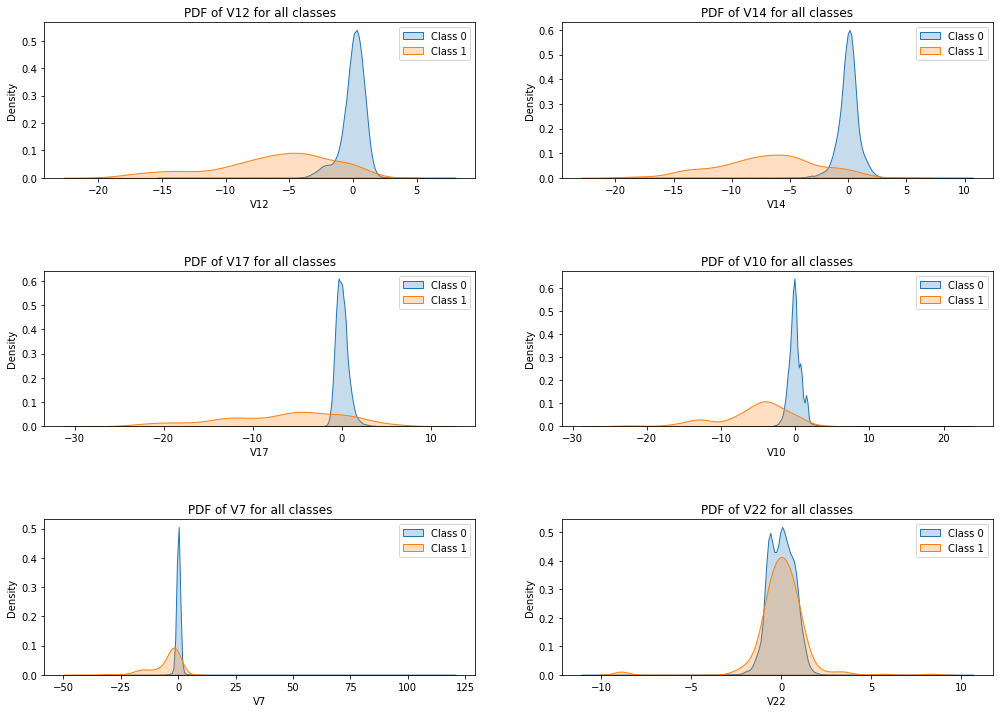

In [8]:
f, axes = plt.subplots(3,2, figsize = (17, 12))

g1 = sns.kdeplot(data=df_cc[df_cc['Class'] == 0]['V12'], label="Class 0", ax = axes[0, 0], shade=True)
g1 = sns.kdeplot(data=df_cc[df_cc['Class'] == 1]['V12'], label="Class 1", ax = axes[0, 0], shade=True)
g1.set_title('PDF of V12 for all classes')
g1.legend(('Class 0', 'Class 1'))
    
#f, axes = plt.subplots(1,1, figsize = (6, 3))
g1 = sns.kdeplot(data=df_cc[df_cc['Class'] == 0]['V14'], label="Class 0", ax = axes[0, 1], shade=True)
g1 = sns.kdeplot(data=df_cc[df_cc['Class'] == 1]['V14'], label="Class 1", ax = axes[0, 1], shade=True)
g1.set_title('PDF of V14 for all classes')
g1.legend(('Class 0', 'Class 1'))

    
#f, axes = plt.subplots(1,1, figsize = (6, 3))
g1 = sns.kdeplot(data=df_cc[df_cc['Class'] == 0]['V17'], label="Class 0", ax = axes[1, 0], shade=True)
g1 = sns.kdeplot(data=df_cc[df_cc['Class'] == 1]['V17'], label="Class 1", ax = axes[1, 0], shade=True)
g1.set_title('PDF of V17 for all classes')
g1.legend(('Class 0', 'Class 1'))

plt.subplots_adjust(wspace = 0.2, hspace=0.6)
    
#f, axes = plt.subplots(1,1, figsize = (6, 3))
g1 = sns.kdeplot(data=df_cc[df_cc['Class'] == 0]['V10'], label="Class 0", ax = axes[1, 1], shade=True)
g1 = sns.kdeplot(data=df_cc[df_cc['Class'] == 1]['V10'], label="Class 1", ax = axes[1, 1], shade=True)
g1.set_title('PDF of V10 for all classes')
g1.legend(('Class 0', 'Class 1'))

#f, axes = plt.subplots(1,1, figsize = (6, 3))
g1 = sns.kdeplot(data=df_cc[df_cc['Class'] == 0]['V7'], label="Class 0", ax = axes[2, 0], shade=True)
g1 = sns.kdeplot(data=df_cc[df_cc['Class'] == 1]['V7'], label="Class 1", ax = axes[2, 0], shade=True)
g1.set_title('PDF of V7 for all classes')
g1.legend(('Class 0', 'Class 1'))


#f, axes = plt.subplots(1,1, figsize = (6, 3))
g1 = sns.kdeplot(data=df_cc[df_cc['Class'] == 0]['V22'], label="Class 0", ax = axes[2, 1], shade=True)
g1 = sns.kdeplot(data=df_cc[df_cc['Class'] == 1]['V22'], label="Class 1", ax = axes[2, 1], shade=True)
g1.set_title('PDF of V22 for all classes')
g1.legend(('Class 0', 'Class 1'))


Let's summarize our findings in the following points:

1. In every select variable, the distribution of the non-fraudulent transaction takes a shape that very close to the standard normal distribution.
2. In every select variable, the distribution of the fraudulent transaction takes a shape that very close to a normal distribution with high standard deviation, i.e. data is highly spread.
3. In the non-select variable, both fraudulent and normal transactions have the same distribution. close to standard normal distribution.

Now, based on the above finding, we decide to use the target variables to build our predictive model. We will analyze the performance of the models using confusion matrix in the later section.

### 3. Build the Predictive Model

In [9]:
#define X as the selected variables/features to be used for building the predictive model
X = df_cc[['V7' , 'V10' , 'V12' , 'V14', 'V17']]

# define y as the label / target variable
y = df_cc[['Class']]

Let's split the dataset above into a training set and a test set. A split of The training set will be used to build classification models. The test set will be used to test and compare the resulting models. 

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 20)

The above training set will be used to build classification model. After that, the given test set below will be used to report the accuracy of the model. The following algorithm will be selected:

-   K Nearest Neighbor(KNN)
-   Decision Tree
-   Support Vector Machine
-   Logistic Regression



In [11]:
y_train.shape

(190820, 1)

#### 3.1 k Nearest Neighbor (KNN)
This method classifies cases based on their similarity to other cases. Here, data points which are near with each other are said to be neighbors. This method is based on similar cases with the same class labels are near each other. The distance between two cases is a measure of their dissimilarity. To run this algorithm, we need to specify a value for k, i.e. number of data point neighbors. Below lines of code describe how we can come up to the best 'k' parameter for the model. 

In [12]:
#normalize the X_train
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)

# choose the best k
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

print('Obtaining the best k: ', end='')
for n in range(1,Ks):  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,np.ravel(y_train))
    ypred = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, ypred)
    print(' .', end='')
print(' done.')
k_best = mean_acc.argmax()+1

print('the best k = ', k_best)

Obtaining the best k:  . . . . . . . . . . . . . . . . . . . done.
the best k =  12


Having the best parameter for the model, let's build an instance for the kNN classifier with the given training set.

In [13]:
knn_classifier = KNeighborsClassifier(n_neighbors = k_best).fit(X_train, np.ravel(y_train))

#### 3.2 Decision Tree
It is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules. The important question here will be, which attribute is the best to be used to split the node into branches. For this one we set the 'entropy' of a node as splitting criteria. Entropy is a measure of randomness or uncertainty. It is used to calculate the homogeneity of the samples in that node. If sample is completely homogeneous, the Entropy is zero. 

In [14]:
from sklearn.tree import DecisionTreeClassifier
dectree_classifier = DecisionTreeClassifier(criterion='entropy')
dectree_classifier.fit(X_train, np.ravel(y_train))

DecisionTreeClassifier(criterion='entropy')

Visualize the Tree we get the following figure.

In [31]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [41]:
dot_data = StringIO()
filename = "frauddectree.png"
featureNames = X.columns[0:5]
targetNames  = df_cc["Class"].unique().tolist()
out          = tree.export_graphviz(dectree_classifier,feature_names=featureNames, out_file=dot_data, class_names= str(np.unique(y_train)), filled=True,  special_characters=True,rotate=False)  
graph        = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img          = mpimg.imread(filename)
plt.figure(figsize=(200, 200))
plt.imshow(img,interpolation='nearest')

#### 3.3 Support Vector Machine
Support Vector Machine (SVM) is a supervised algorithm that classifies cases by finding a separator, by mapping data to a high-dimensional feature space so data points can be categorized, even when the data are not otherwise linearly separable.

In [15]:
from sklearn import svm
svm_classifier = svm.SVC(kernel='rbf',gamma='auto')
svm_classifier.fit(X_train, np.ravel(y_train))

SVC(gamma='auto')

#### 3.4 Logistic Regression
Logistic Regression (LR) is a classification algorithm for categorical variables, i.e when the dependent or target variable is in a form {'Yes' or 'No'}, {'Male' or 'Female'}, {'passed' or 'Not passed'}, {'Benign' or 'Malignant'}, etc. The LR algirthm is suitable if your data is binary, if you need probabilistic results, when you need a linear decision boundary or when you need to understand the impact of a feature. In order to find the best parameter for our model, we need to minimize the cost function. Cost function basically compares the predicted values with the actual values. Cost function minimization can be done through applying optimization solver. By using LogisticRegression library of Scikit Learn in Python, we can tune the parameter 'solver'. Library solvers include ‘liblinear’, ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ solvers. Parameter 'C' represents inverse of regularization strength, must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg_classifier = LogisticRegression(C=0.01,solver='newton-cg')
log_reg_classifier.fit(X_train, np.ravel(y_train))

LogisticRegression(C=0.01, solver='newton-cg')

### 4. Evaluate the Model
Let's evaluate the built models by using the following evaluation parameters. 
1. **Jaccard Index** <br>
    It is defined as the ratio between the size of intersection and the size of union of actual and predicted label sets. The closer value of the Jaccard index to one (1), the more accurate the model.
2. **F1-score** <br>
    defined as the harmonic average of the precision and recall calculated from the confusion matrix. The closer the score to one (1) the more accuracy the model will be.
3. **Log-Loss** <br>
    It measures the performance of a classifier where the predicted output is probability value between zero (0) and one (1). In here, classifier with lower Log Loss (close to zero) has better accuracy. Since the response we have in this model can be converted to {'Non-Fraud':0, 'Fraud':1}, this evaluation metric can be used. 

First, let's call the required libraries.

In [17]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix
import itertools

Use the evaluation parameters above, we get the following table

In [42]:
#normalize the X_test
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

#K nearest neighbors
knn_pred    = knn_classifier.predict(X_test)
knn_jaccard = jaccard_score(y_test, knn_pred)
knn_f1      = f1_score(y_test, knn_pred)
knn_logloss = log_loss(y_test, knn_pred)
knn_cm      = confusion_matrix(y_test, knn_pred)

#decision tree
dectree_pred    = dectree_classifier.predict(X_test)
dectree_jaccard = jaccard_score(y_test, dectree_pred)
dectree_f1      = f1_score(y_test, dectree_pred)
dectree_logloss = log_loss(y_test, dectree_pred)
dectree_cm      = confusion_matrix(y_test, dectree_pred)

#svm
svm_pred    = svm_classifier.predict(X_test)
svm_jaccard = jaccard_score(y_test, svm_pred)
svm_f1      = f1_score(y_test, svm_pred)
svm_logloss = log_loss(y_test, svm_pred)
svm_cm      = confusion_matrix(y_test, svm_pred)

#logistic regression
log_reg_pred    = log_reg_classifier.predict(X_test)
log_reg_jaccard = jaccard_score(y_test, log_reg_pred)
log_reg_f1      = f1_score(y_test, log_reg_pred)
log_reg_logloss = log_loss(y_test, log_reg_pred)
log_reg_cm      = confusion_matrix(y_test, log_reg_pred)


In [44]:
acc_eval = {'kNN':[knn_jaccard,knn_f1,knn_logloss] , 'Dec-Tree':[dectree_jaccard, dectree_f1,dectree_logloss] , 
            'SVM':[svm_jaccard,svm_f1,svm_logloss] , 'Log-Reg' :[log_reg_jaccard,log_reg_f1,log_reg_logloss]  }

In [45]:
df_eval = pd.DataFrame(acc_eval,index = ['Jaccard','F1-score','LogLoss'])
df_eval

kNN  Dec-Tree       SVM   Log-Reg
Jaccard   0.727273  0.601093  0.684564  0.512658
F1-score  0.842105  0.750853  0.812749  0.677824
LogLoss   0.015434  0.026827  0.017272  0.028296

#### Check confusion matrix 
Let's check the confusion matrix of each classifier to visualize the performance the algorithm. Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class. The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another).

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[93833    11]
 [   31   112]]


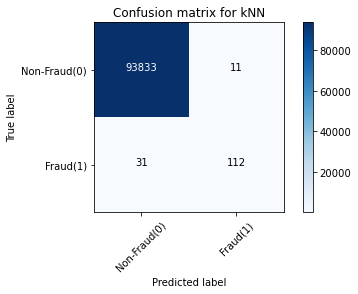

In [30]:
# kNN confusion matrix
plot_confusion_matrix(knn_cm, classes=['Non-Fraud(0)','Fraud(1)'],normalize= False,  title='Confusion matrix for kNN')


Confusion matrix, without normalization
[[93804    40]
 [   33   110]]


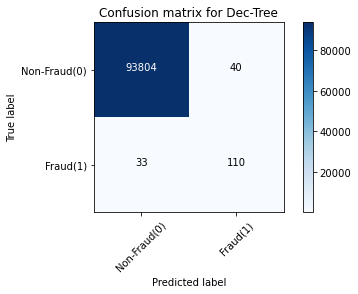

In [29]:
# Decision Tree confusion matrix
plot_confusion_matrix(dectree_cm, classes=['Non-Fraud(0)','Fraud(1)'],normalize= False,  title='Confusion matrix for Dec-Tree')


Confusion matrix, without normalization
[[93838     6]
 [   41   102]]


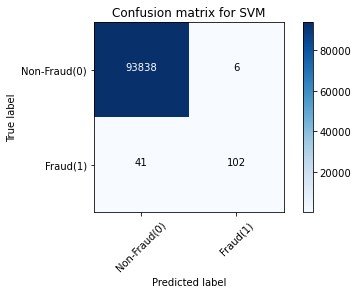

In [28]:
#SVM confusion matrix
plot_confusion_matrix(svm_cm, classes=['Non-Fraud(0)','Fraud(1)'],normalize= False,  title='Confusion matrix for SVM')


Confusion matrix, without normalization
[[93829    15]
 [   62    81]]


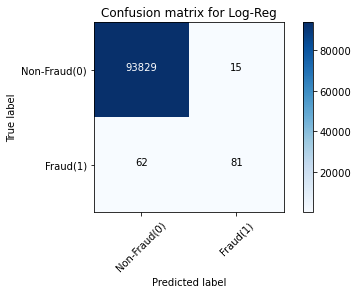

In [27]:
# Logistic Regression confusion matrix
plot_confusion_matrix(log_reg_cm, classes=['Non-Fraud(0)','Fraud(1)'],normalize= False,  title='Confusion matrix for Log-Reg')


### 5. Conclusions & Recommendations

#### Conclusions
1. Credit card fraudulent analysis has been made based on the given dataset. Here, exploratory statistics have been conducted to check and visualize the correlation between the available features. Subsequent features reduction have been done by analyzing probability density function of the sample with respect to the target label 'Class'.
2. Several machine learning classification algorithms have been utilized to build the prediction models. Here, the given dataset is split into a training set and a test set with a ratio of 3:1 and a given random state of 20 valid for all classifiers.
3. The built models are evaluated based on the selected accuracy parameters and confusion matrix for each model is presented to visualize the performance of the algorithm. 
4. We found k-Nearest Neighbors classifier with k=12 outperformed the other classifiers in terms of accuracy based on Jaccard index and F1-score analysis. By observing the confusion matrix of the predicted values based on kNN, we found that kNN predicted 112 of True Negative, i.e. number of fraudulent transactions correctly predicted as fraudulent. Furthermore, the kNN classifier also has False Negative of 11, i.e. number of non-fraudulent transactions falsely predicted as fraudulent. This is the **type-II error** that we should minimize to avoid e.g. making unnecessary damage for having someone stamped as fraud. Furthermore, with a Log-Loss of 0.015, we can conclude that kNN has a better prediction compare to ther classifiers.

#### Recommendations
1. The analysis is made based on the reduced features. For the next analysis, it is recommended to use all features in the analysis and build the classifiers.
2. Apply other type of machine learning algorithms and subsequent accuracy analysis. Perform k-Fold Cross validation method for having better accuracy analysis.
3. Use Neural Network or deep learning algorithm to develop the predictive model.

Thanks for reading the analysis. Wanto to learn more? Contact me at faisal.irzal@gmail.com